<font size=6><b>Lec12. Backtest

# zipline 

# Backtrader

* Homepage: https://www.backtrader.com/
* Github: https://github.com/backtrader/backtrader

In [1]:
# ! pip install backtrader
# ! pip install yfinance

In [2]:
# ! pip install jupyterlab_widgets

In [3]:
# ----------------------------------------------------------------------------------------- 
# backtest trader 와 matplotlib 호환성 문제 발생 (현재 설치버전 : 3.6.x)
# matplotlib 강제 다운그레이드 
# cerebro.plot()   --> ImportError: cannot import name 'warnings' from 'matplotlib.dates' (c:\ai\pythonproject7\venv\lib\site-packages\matplotlib\dates.py)
#-------------------------------------------------------------------------------------------
# ! pip uninstall matplotlib
# ! pip install matplotlib==3.2.2

In [9]:
# ! pip install ipympl    #ipympl-0.9.2
# ! jupyter lab build  --> pycharm 터미널에서 실행????

## SMA 매매

In [10]:
from IPython.display import display, HTML # my imports
# annot = coco_dataset.display_image(21, use_url=False) #my function return a html page
# HTML(annot) # used for displaying the page
import ipympl

# %matplotlib inline
%matplotlib widget

## RSI 

Final Portfolio Value: $11755.2851701423
P/L: $1755.2851701423006


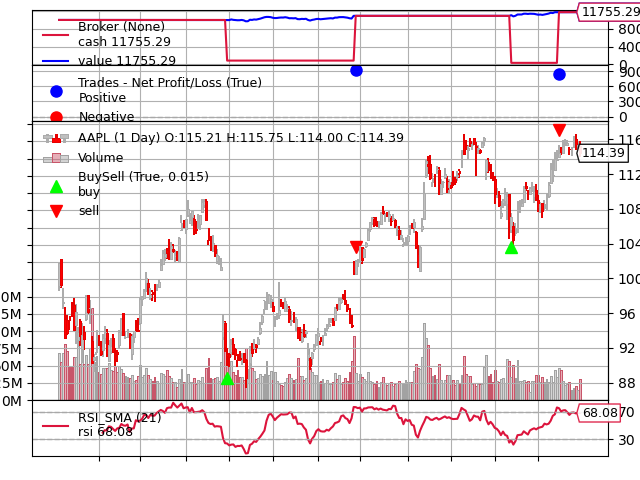

[[<Figure size 640x480 with 5 Axes>]]

In [12]:
import backtrader as bt
from datetime import datetime

class firstStrategy(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)


#Variable for our starting cash
startcash = 10000

#Create an instance of cerebro
cerebro = bt.Cerebro()

#Add our strategy
cerebro.addstrategy(firstStrategy)

#Get Apple data from Yahoo Finance.

data = bt.feeds.Quandl(
  dataname='AAPL',
  fromdate = datetime(2016,1,1),
  todate = datetime(2017,1,1),
  buffered= True
  )

#Add the data to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(startcash)

# Run over everything
cerebro.run()

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

#Print out the final result
print('Final Portfolio Value: ${}'.format(portvalue))
print('P/L: ${}'.format(pnl))

#Finally plot the end results
# cerebro.plot(style='candlestick')

cerebro.plot(iplot=False, style='candlestick')

## 2개 자산 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


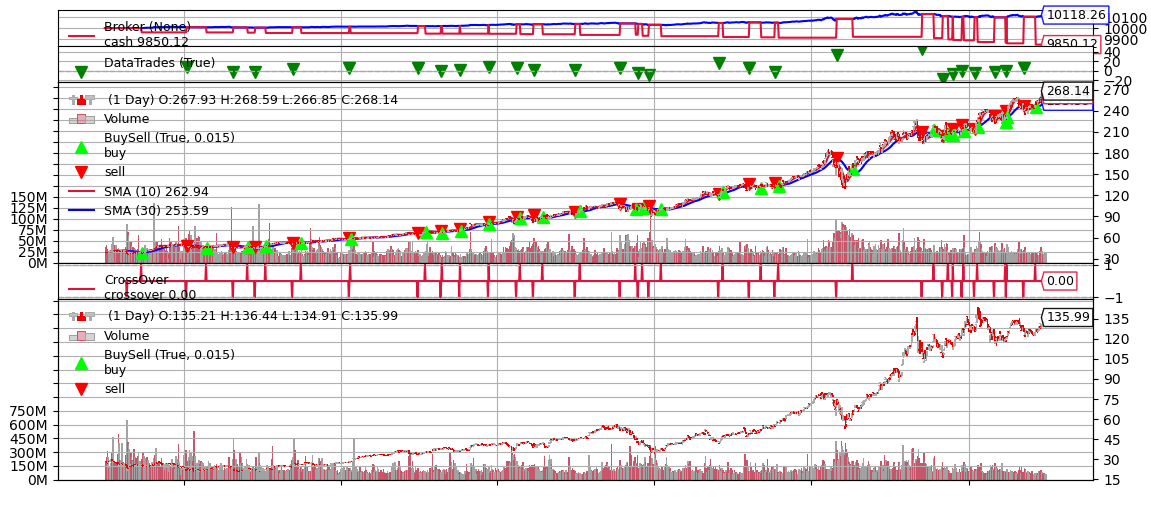

[[<Figure size 1151x505 with 7 Axes>]]

In [13]:
from datetime import datetime
import backtrader as bt


# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30  # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed :: 올드버전 에러 
# data = bt.feeds.YahooFinanceData(dataname='MSFT', fromdate=datetime(2011, 1, 1), todate=datetime(2021, 12, 31))
# data1 = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2011, 1, 1), todate=datetime(2021, 12, 31))


data = bt.feeds.PandasData(dataname=yf.download('MSFT', '2015-07-06', '2021-07-01', auto_adjust=True))
data1 = bt.feeds.PandasData(dataname=yf.download('AAPL', '2015-07-06', '2021-07-01', auto_adjust=True))

cerebro.adddata(data)  # Add the data feed
cerebro.adddata(data1)  # 2번째 데이터 추가

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
# cerebro.plot()  # and plot it with a single command
cerebro.plot(iplot=False, style='candlestick')